In [83]:
import numpy as np
import matplotlib.pyplot as plt
import ast

In [84]:
voltages = np.loadtxt("data/voltages-RT.csv", delimiter=",")
print(len(voltages))
# Load the 2D array from the CSV file
loaded_arr = np.loadtxt("data/raw_data.csv", delimiter=",")
 
# Reshape the 2D array back to its original 3D shape
real_values = loaded_arr.reshape((310,2,140))

310


In [85]:
print(real_values[0][0])
print(real_values[0][1])

[1537.88574586 1537.88850829 1537.89127072 1537.89403315 1538.04872928
 1538.06254144 1538.06530387 1538.08464088 1538.09016575 1538.09569061
 1538.10674033 1538.18132597 1538.20342541 1538.39403315 1538.43270718
 1538.54872928 1538.54872928    0.            0.            0.
    0.            0.            0.            0.            0.
    0.            0.            0.            0.            0.
    0.            0.            0.            0.            0.
    0.            0.            0.            0.            0.
    0.            0.            0.            0.            0.
    0.            0.            0.            0.            0.
    0.            0.            0.            0.            0.
    0.            0.            0.            0.            0.
    0.            0.            0.            0.            0.
    0.            0.            0.            0.            0.
    0.            0.            0.            0.            0.
    0.            0.           

In [86]:
masked_values = np.ma.array(real_values)
masked_values = np.ma.masked_where(masked_values == 0.0, masked_values) #masks all values that are 0
print(masked_values.shape)
print(masked_values)

(310, 2, 140)
[[[1537.8857458563477 1537.8885082872869 1537.891270718226 ... -- -- --]
  [-15.516129032258279 -15.516129032258279 -15.516129032258279 ... -- --
   --]]

 [[1537.7282872928174 1537.7282872928174 1537.742099447513 ... -- -- --]
  [-15.35483870967763 -15.3225806451615 -15.35483870967763 ... -- -- --]]

 [[1537.7282872928174 1537.7282872928174 1537.742099447513 ... -- -- --]
  [-15.35483870967763 -15.3225806451615 -15.35483870967763 ... -- -- --]]

 ...

 [[1537.7973480662956 1537.9078453038608 1537.9161325966782 ... -- -- --]
  [-15.774193548387318 -16.709677419355046 -16.709677419355046 ... -- --
   --]]

 [[1537.8829834254086 1537.8940331491651 1537.9050828729216 ... -- -- --]
  [-16.48387096774215 -16.580645161290533 -16.709677419355046 ... -- --
   --]]

 [[1537.7697237569043 1537.8885082872869 1537.8967955801043 ... -- -- --]
  [-15.774193548387318 -16.516129032258277 -16.61290322580666 ... -- --
   --]]]


In [87]:
# y_values = [0,0,100,97,98,0,99,101,0,102,99,105,101]
# x_values = [0,1,2,3,4,5,6,7,8,9,10,11,12]

# #give a threshold
# threshold = 0

# #prepare for masking arrays - 'conventional' arrays won't do it
# y_values = np.ma.array(y_values)
# #mask values below a certain threshold
# y_values_masked = np.ma.masked_where(y_values < threshold , y_values)

In [88]:
# new_values = np.zeros((314, 2, 144))
# for i in range(0,2): #len(load_original_arr)):
#     for j in range(0, 2):
#         line = np.zeros((2,144))
#         y = np.ma.array(load_original_arr[i][j])
#         y = np.ma.masked_where(y == 0.0, y)
#         print(y)
#         line[j] = y
#         print(line[j])
#     new_values[i] = line
#     # targetx = load_original_arr[i][0]
#     # targety = load_original_arr[i][1]
#     # tmpx = targetx[targetx != 0]
#     # tmpy = targety[targety != 0]
#     # line = []
#     # line.append(tmpx)
#     # line.append(tmpy)
#     # new_values.append(line)

# #print(new_values[0][0])

In [89]:
#now i have all the x and y arrays in one big array
#so x would be new_values[n][0]
#and y would be new_values[n][1]
#with voltage[n] being the voltage
#next I need to graph 1 amd -1 to match them up as well as n=100 to check for differences

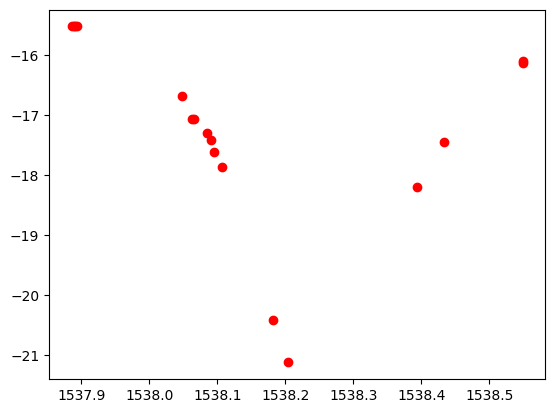

In [90]:

plt.plot(masked_values[0][0], masked_values[0][1], 'ro', label='data')
plt.show()

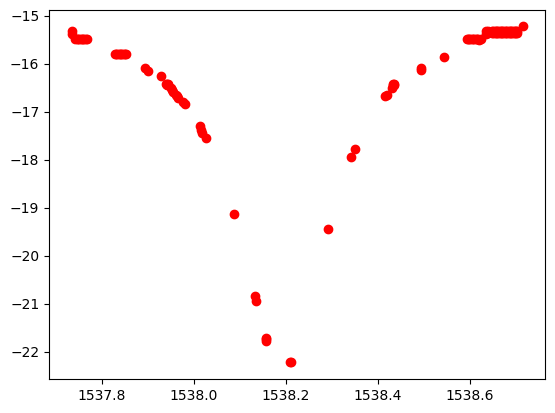

In [91]:
plt.plot(masked_values[243][0], masked_values[243][1], 'ro', label='data')
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


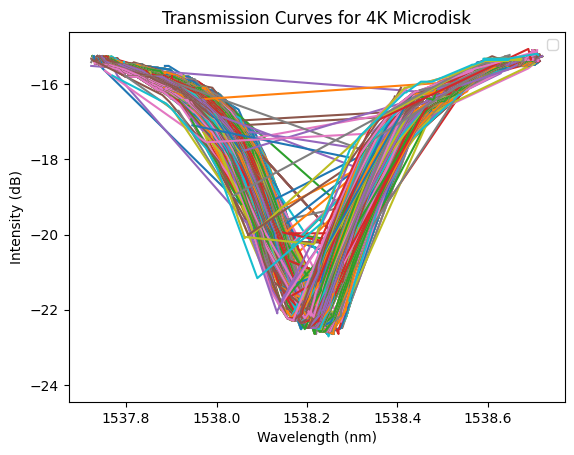

In [92]:
#This is everything, but we should clean up some noise.

for i in range(0,310):
    plt.plot(masked_values[i][0], masked_values[i][1])  #if needed , label = .3f'$\\alpha = {voltages[i]}$'
plt.legend()
plt.title("Transmission Curves for 4K Microdisk")
plt.xlabel('Wavelength (nm)')
plt.ylabel('Intensity (dB)')
plt.savefig("figures/RT-crude.png")
plt.show()

In [93]:
# set a threshold for the number of points in an array and mask the smaller ones 

threshold = 24
check = []
for i in range(len(real_values)):
    new_values = real_values[i][0][real_values[i][0] != 0]
    if len(new_values) < threshold:
        check.append(i)

print(len(check))
print(check)

42
[0, 32, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 50, 51, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 250, 297, 298, 299, 300, 301, 302, 303, 304, 305, 306, 307]


In [94]:
#masks all arrays in the index: check
print(len(masked_values) - len(check))
masked_voltages = np.ma.array(voltages)
for i in check:
    masked_values[i][0] = np.ma.masked_greater(masked_values[i][0], 0)
    masked_values[i][1] = np.ma.masked_less(masked_values[i][1], 0)
    masked_voltages[i] = np.ma.masked

print(masked_values[0][0])
print(masked_values[0][1])
print(masked_voltages)

268
[-- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --]
[-- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --]
[-- -0.9883870967741992 -0.982580645161296 -0.9767741935483927
 -0.9709677419354894 -0.9651612903225861 -0.9593548387096829
 -0.95354838709677

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


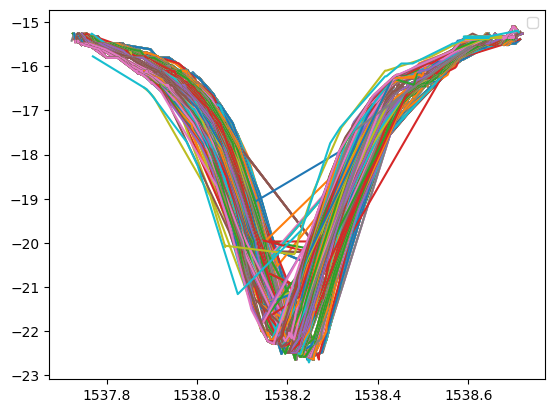

In [95]:
#nope! now we can re plot


for i in range(len(masked_values)):
    plt.plot(masked_values[i][0], masked_values[i][1])  #if needed , label = .3f'$\\alpha = {voltages[i]}$'
plt.legend()
plt.show()


In [96]:
#better, but still some noise
#The tops are generally fine, that'll get fixed in fits
#I should find a way to get rid of data with no full bottom curve
#I can see two in particular that are bad

#let's plot piece by piece to see what's going on
#we'll take down all the check values and mask those arrays


# for i in range(0,50):
#     plt.plot(masked_values[i][0], masked_values[i][1])
# plt.legend(loc = 'upper right')
# plt.show()

#this one has some issues. Ill expand and find them

In [97]:
#find the lowest value on the graph

#should be 15.142857142857174
test = masked_values[1][1]
lowest = 15.142857142857174
print(test[0])
print(test[0]+lowest)


-15.35483870967763
-0.21198156682045521


In [98]:
#i assume the top of the graph is 0 because there is around 15db of loss so I get rid of that and reposition the curve

#add the lowest value to each y value so the top is 0
        
for i in range(0,len(masked_values)):
    masked_values[i][1] = masked_values[i][1] + lowest


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


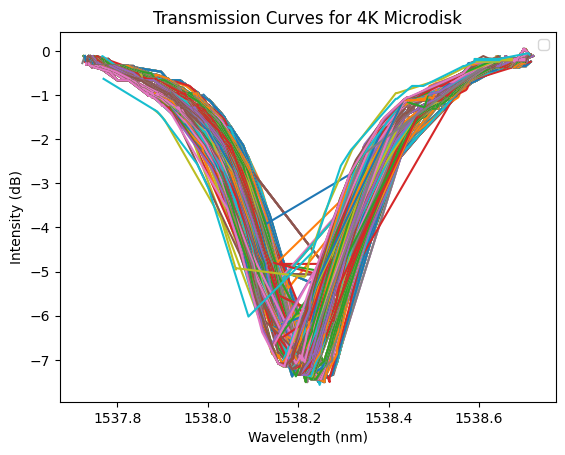

In [99]:
#lets regraph

for i in range(len(masked_values)):
    plt.plot(masked_values[i][0], masked_values[i][1])  #if needed , label = .3f'$\\alpha = {voltages[i]}$'
plt.legend()
plt.title("Transmission Curves for 4K Microdisk")
plt.xlabel('Wavelength (nm)')
plt.ylabel('Intensity (dB)')
plt.show()


In [100]:
print(masked_values[10][0])

[1537.7282872928174 1537.742099447513 1537.742099447513 1537.7448618784522
 1537.7448618784522 1537.7476243093913 1537.7476243093913
 1537.7503867403304 1537.7503867403304 1537.7531491712696
 1537.7531491712696 1537.7559116022087 1537.7559116022087
 1537.7586740331478 1537.7586740331478 1537.761436464087 1537.761436464087
 1537.764198895026 1537.764198895026 1537.7669613259652 1537.7669613259652
 1537.7780110497217 1537.7780110497217 1537.7807734806609
 1537.7807734806609 1537.7918232044174 1537.7945856353565
 1537.8001104972348 1537.8028729281739 1537.805635359113
 1537.8083977900521 1537.8111602209913 1537.8139226519304
 1537.8166850828695 1537.8194475138087 1537.8222099447478
 1537.824972375687 1537.8360220994434 1537.8387845303826
 1537.8967955801043 1537.913370165739 1537.9161325966782
 1537.9188950276173 1537.9216574585564 1537.9244198894955
 1537.9271823204347 1537.9299447513738 1537.932707182313 1537.935469613252
 1537.9382320441912 1537.979668508278 1537.9824309392172
 1537.98

In [101]:
#sick, I did it. Now I need to convert from dB to a fraction. I can check the binary code for this.

def dB2Frac(dB):
    return 10**(dB/10)

In [102]:
#run all values through dB2Frac

for i in range(0,len(masked_values)):
    masked_values[i][1] = dB2Frac(masked_values[i][1])

In [103]:
print(masked_values[10][0])

[1537.7282872928174 1537.742099447513 1537.742099447513 1537.7448618784522
 1537.7448618784522 1537.7476243093913 1537.7476243093913
 1537.7503867403304 1537.7503867403304 1537.7531491712696
 1537.7531491712696 1537.7559116022087 1537.7559116022087
 1537.7586740331478 1537.7586740331478 1537.761436464087 1537.761436464087
 1537.764198895026 1537.764198895026 1537.7669613259652 1537.7669613259652
 1537.7780110497217 1537.7780110497217 1537.7807734806609
 1537.7807734806609 1537.7918232044174 1537.7945856353565
 1537.8001104972348 1537.8028729281739 1537.805635359113
 1537.8083977900521 1537.8111602209913 1537.8139226519304
 1537.8166850828695 1537.8194475138087 1537.8222099447478
 1537.824972375687 1537.8360220994434 1537.8387845303826
 1537.8967955801043 1537.913370165739 1537.9161325966782
 1537.9188950276173 1537.9216574585564 1537.9244198894955
 1537.9271823204347 1537.9299447513738 1537.932707182313 1537.935469613252
 1537.9382320441912 1537.979668508278 1537.9824309392172
 1537.98

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


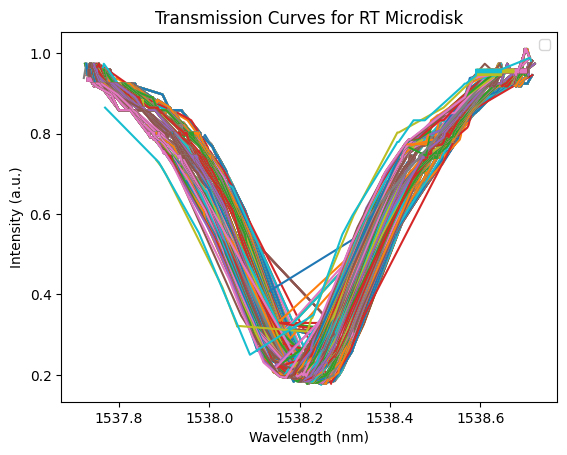

In [104]:
#lets regraph again

for i in range(len(masked_values)):
    plt.plot(masked_values[i][0], masked_values[i][1])  #if needed , label = .3f'$\\alpha = {voltages[i]}$'
plt.legend()
plt.title("Transmission Curves for RT Microdisk")
plt.xlabel('Wavelength (nm)')
plt.ylabel('Intensity (a.u.)')
plt.savefig("figures/Gehl-RT-Curves.png")
plt.show()


In [105]:
normalized_values = np.ma.getdata(masked_values)
data_mask = np.ma.getmask(masked_values)


In [106]:
print(data_mask[10][0])

[False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True]


In [107]:
# Reshape the data and the mask to 2D array
data_reshaped = normalized_values.reshape(normalized_values.shape[0], -1)
mask_reshaped = data_mask.reshape(data_mask.shape[0], -1)

# # Save the 2D array to a CSV file
np.savetxt("data/normalized_data.csv", data_reshaped, delimiter=",")
np.savetxt("data/cleaning_mask.csv", mask_reshaped, delimiter=",")
 
# # Load the 2D array from the CSV file
loaded_data = np.loadtxt("data/normalized_data.csv", delimiter=",")
loaded_mask = np.loadtxt("data/cleaning_mask.csv", delimiter=",")
 
# Reshape the 2D array back to its original 3D shape
load_original_arr = loaded_data.reshape(310,2,140)
load_original_mask = loaded_mask.reshape(310,2,140)
 
# Verify if the loaded array matches the original
if np.array_equal(load_original_arr,normalized_values):
    print("Yes, both the arrays are the same")
else:
    print("No, both the arrays are not the same")

Yes, both the arrays are the same


In [108]:
# Verify if the loaded array matches the original
if np.array_equal(load_original_mask,data_mask):
    print("Yes, both the arrays are the same")
else:
    print("No, both the arrays are not the same")

Yes, both the arrays are the same


In [109]:
print(normalized_values.shape[0],normalized_values.shape[1],normalized_values.shape[2])
print(data_mask.shape[0],data_mask.shape[1],data_mask.shape[2])

310 2 140
310 2 140


In [110]:
clean_data = np.ma.masked_array(load_original_arr, load_original_mask)
if np.array_equal(masked_values,clean_data):
    print("Yes, both the arrays are the same")
else:
    print("No, both the arrays are not the same")

Yes, both the arrays are the same


In [111]:
i = 1
j = 1
print(masked_values[i][j])
print(clean_data[i][j])

[0.9523615283832255 0.9594617146103483 0.9523615283832255
 0.9594617146103483 0.9523615283832255 0.9594617146103483
 0.9523615283832255 0.9594617146103483 0.9523615283832255
 0.9594617146103483 0.9523615283832255 0.9594617146103483
 0.9523615283832255 0.9594617146103483 0.9523615283832255
 0.9594617146103483 0.9523615283832255 0.9594617146103483
 0.9523615283832255 0.9594617146103483 0.9523615283832255
 0.9594617146103483 0.9523615283832255 0.9594617146103483
 0.945313884788802 0.9594617146103483 0.9244823359196304
 0.9176410032757524 0.9244823359196304 0.9244823359196304
 0.9244823359196304 0.9244823359196304 0.9244823359196304
 0.9244823359196304 0.9244823359196304 0.9244823359196304
 0.9244823359196304 0.9244823359196304 0.9244823359196304
 0.9176410032757524 0.8974192719421803 0.8583028468191216
 0.8583028468191216 0.8583028468191216 0.8583028468191216
 0.8583028468191216 0.8583028468191216 0.8583028468191216
 0.8583028468191216 0.8583028468191216 0.8583028468191216
 0.802801721182

In [112]:
volt_mask = np.ma.getmask(masked_voltages)
np.savetxt("data/voltage_mask.csv", volt_mask, delimiter = ",")

In [113]:
print(masked_values[10][0])

[1537.7282872928174 1537.742099447513 1537.742099447513 1537.7448618784522
 1537.7448618784522 1537.7476243093913 1537.7476243093913
 1537.7503867403304 1537.7503867403304 1537.7531491712696
 1537.7531491712696 1537.7559116022087 1537.7559116022087
 1537.7586740331478 1537.7586740331478 1537.761436464087 1537.761436464087
 1537.764198895026 1537.764198895026 1537.7669613259652 1537.7669613259652
 1537.7780110497217 1537.7780110497217 1537.7807734806609
 1537.7807734806609 1537.7918232044174 1537.7945856353565
 1537.8001104972348 1537.8028729281739 1537.805635359113
 1537.8083977900521 1537.8111602209913 1537.8139226519304
 1537.8166850828695 1537.8194475138087 1537.8222099447478
 1537.824972375687 1537.8360220994434 1537.8387845303826
 1537.8967955801043 1537.913370165739 1537.9161325966782
 1537.9188950276173 1537.9216574585564 1537.9244198894955
 1537.9271823204347 1537.9299447513738 1537.932707182313 1537.935469613252
 1537.9382320441912 1537.979668508278 1537.9824309392172
 1537.98

In [114]:
print(clean_data[10][0])

[1537.7282872928174 1537.742099447513 1537.742099447513 1537.7448618784522
 1537.7448618784522 1537.7476243093913 1537.7476243093913
 1537.7503867403304 1537.7503867403304 1537.7531491712696
 1537.7531491712696 1537.7559116022087 1537.7559116022087
 1537.7586740331478 1537.7586740331478 1537.761436464087 1537.761436464087
 1537.764198895026 1537.764198895026 1537.7669613259652 1537.7669613259652
 1537.7780110497217 1537.7780110497217 1537.7807734806609
 1537.7807734806609 1537.7918232044174 1537.7945856353565
 1537.8001104972348 1537.8028729281739 1537.805635359113
 1537.8083977900521 1537.8111602209913 1537.8139226519304
 1537.8166850828695 1537.8194475138087 1537.8222099447478
 1537.824972375687 1537.8360220994434 1537.8387845303826
 1537.8967955801043 1537.913370165739 1537.9161325966782
 1537.9188950276173 1537.9216574585564 1537.9244198894955
 1537.9271823204347 1537.9299447513738 1537.932707182313 1537.935469613252
 1537.9382320441912 1537.979668508278 1537.9824309392172
 1537.98